# **PCA**







#Step 1 : import libraries

In [120]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [121]:
wine = load_wine()

In [122]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
X = wine_df
y = wine.target

In [123]:
X.head()
#y.shape

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [125]:
sc = StandardScaler()
X_train_sc= sc.fit_transform(X_train)
X_test_sc= sc.transform(X_test)
X_train_sc

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [126]:
pca = PCA(n_components=2)
X_train_sc_pca= pca.fit_transform(X_train_sc)
X_test_sc_pca = pca.transform(X_test_sc)



#Step 6: Fitting Logistic Regression To the training set




In [127]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_sc_pca,y_train)

LogisticRegression(random_state=42)

#Step 7: Predicting the test set result




In [128]:
y_pred = lr.predict(X_test_sc_pca)

In [129]:
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

#Step 8: Making the confusion matrix




Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


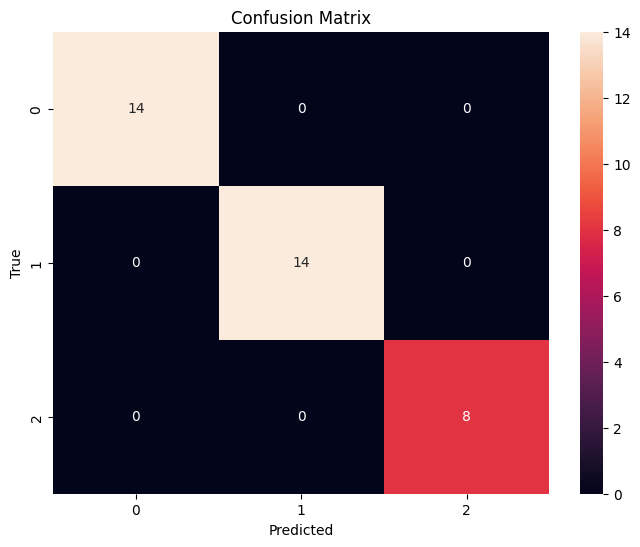

In [130]:
cm = confusion_matrix(y_test, predict)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Step 9: Predicting the training set result




In [131]:
predict_train = lr.predict(X_train_pca)

#Step 10: Visualizing the Test set results




In [132]:
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

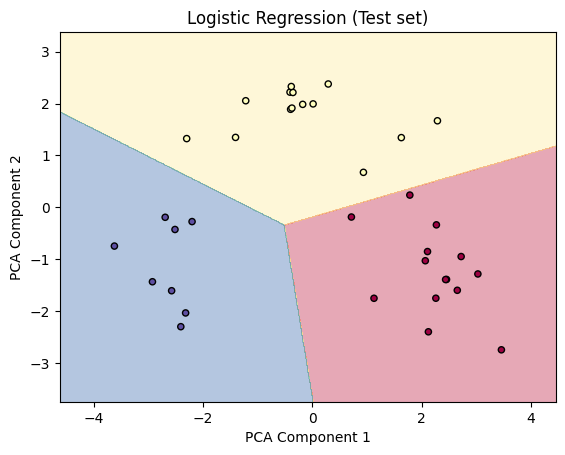

In [133]:
plot_decision_boundary(X_test_pca, y_test, lr, title='Logistic Regression (Test set)')


#**Well Done :)**
Now let's practice!